#### Authors: Massimo Stefani, Eva Ray 

## Data Management - Lab 5
### Exercise 1 - Data transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 2.1 : Discretization by binning
---------------------------- 


You have access to all the grades obtained in an exam and aim to group them into discrete categories.

<p style='color:red;font-weight:bold'>Exercise 2.1.1</p>

First, retrieve the data from the CSV file named _grades_data.csv_. Display it using a box plot to observe the data distribution.

> Where is the median?

On the boxplot, the median is represented as the line inside the box. It means that 50% of the data is above or equal to this valeur and 50% below or equal. Here, the median is ~3.75. 

> What about the 25th and 75th percentiles? What do these values represent?

The 25th percentile is the line at then end of the lower "whisker", the 75th percentile is the the line at the end of the upper "whisker". A whisker is the line that extends from the box to the highest or lowest value excluding outliers. Here, the 25th percentile is 2.5 and the 75th percentile is 4.7.

- 25th percentile: 25% of the data in the dataset is below this value
- 75th percentile: 75% of the data in the dataset is below this value

> Do we observe any outliers, and if so, where are they?

Yes, we observe outliers in the dataset. They are represented as individual points that fall outside the whiskers of the box plot. In this case, there are outliers above the upper whisker, indicating that there are some grades significantly higher than the rest of the data.

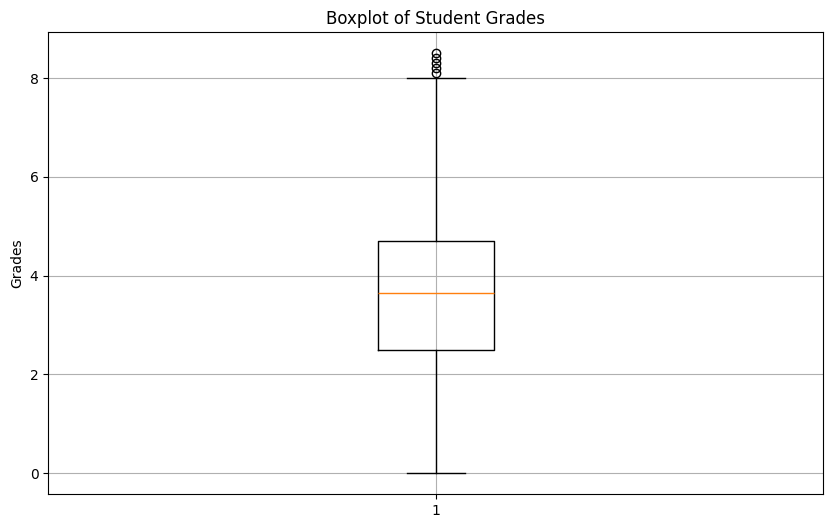

Median: 3.6500000000000004
Q1: 2.5
Q3: 4.7


In [10]:
# Load data from CSV
data = pd.read_csv('data/grades_data.csv')

# Display the data in a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data['Grade'], vert=True)
plt.title('Boxplot of Student Grades')
plt.ylabel('Grades')
plt.grid(True)
plt.show()

# Calculate median, Q1, and Q3
median = np.median(data['Grade'])
q1 = np.percentile(data['Grade'], 25)
q3 = np.percentile(data['Grade'], 75)

print(f'Median: {median}')
print(f'Q1: {q1}')
print(f'Q3: {q3}')


<p style='color:red;font-weight:bold'>Exercise 2.1.2</p>

- Perform data binning using the two techniques discussed in the theory: equal width and equal frequency binning. For both steps, you can call print_bins() to visualize your bins.
> What do you observe in these two binning methods? List the advantages and disadvantages of each.

On the vizualization of the two binning methods, we can observe that the mean value of each bin varies between the two methods. In equal width binning, since the width of each bin is the same, the mean values of the bins are more evenly distributed. In equal frequency binning, the mean values can vary more significantly because the bins are created to contain an equal number of data points, which can lead to some bins having a wider range of values than others.

- Equal Width Binning:
  - Advantages:
    - Simple to implement and understand.
    - The consistent bin width can simplify analysis and visualization.
  - Disadvantages:
    - Outliers can significantly affect the width of the bins.
    - May not handle non regular data distributions well, leading to some bins being overpopulated while others are sparse.

- Equal Frequency Binning:
  - Advantages:
    - Handles non regular data better by ensuring each bin has approximately the same number of data points.
    - Not really affected by outliers since bin size is based on data distribution.
  - Disadvantages:
    - More complex to implement.
    - Bin ranges can vary significantly, which might be less intuitive.
    - Managing categorical data can be challenging.

Equal Width Bins:


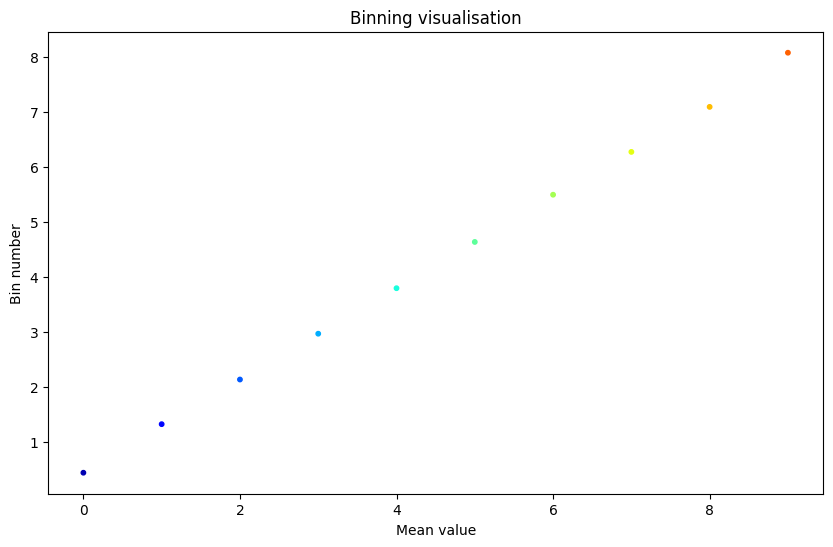

Equal Frequency Bins:


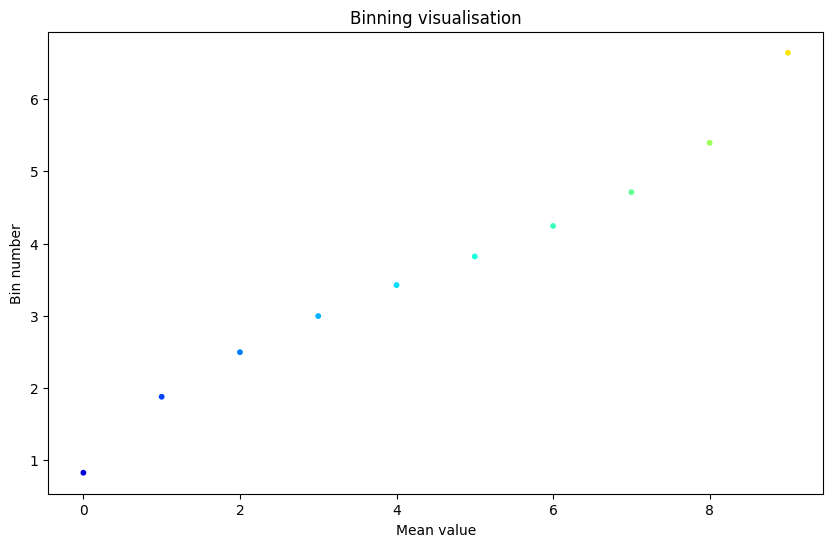

In [14]:
# Given function to visualize the bins

jet = plt.colormaps['jet']

def print_bins(bins):
    x = []
    y = []
    cols = []
    bin_number = len(bins)
    for i in range(bin_number):
        x.append(i)
        y.append(np.mean(bins[i]))
        cols.append(jet(np.mean(bins[i]) / 10))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c=cols, s=10)
    plt.title('Binning visualisation')
    plt.xlabel('Mean value')
    plt.ylabel('Bin number')
    plt.show()

def create_bins_equal_width(data, nb_bins):
    min_value = np.min(data)
    max_value = np.max(data)
    # the width of each bin is (max - min) / nb_bins
    bin_width = (max_value - min_value) / nb_bins
    bins = [[] for _ in range(nb_bins)]
    
    for value in data:
        # determine the appropriate bin for the value by checking if its falls within the bin range
        bin_index = min(int((value - min_value) / bin_width), nb_bins - 1)
        bins[bin_index].append(value)
    
    return bins

def create_bins_equal_frequency(data, nb_bins):
    sorted_data = np.sort(data)
    # Since each bin should have approximately the same number of elements, we can calculate the size of each bin by 
    # dividing the total number of elements by the number of bins
    bin_size = len(data) // nb_bins
    bins = []
    
    for i in range(nb_bins):
        # Determine the start index and end index for each bin
        start_index = i * bin_size
        if i == nb_bins - 1: # special case for the last bin to include any remaining elements
            end_index = len(data)
        else:
            end_index = (i + 1) * bin_size
        bins.append(sorted_data[start_index:end_index].tolist())
    
    return bins

bins_equal_widt = create_bins_equal_width(data['Grade'], 10)
print("Equal Width Bins:")
print_bins(bins_equal_widt)

print("Equal Frequency Bins:")
bins_equal_freq = create_bins_equal_frequency(data['Grade'], 10)
print_bins(bins_equal_freq)

#### Exercise 2.2 : Concept Hierarchy Generation
---------------------------- 

You have access to a CSV file named _clothes_data.csv_ containing the inventory of a clothing store. Your task is to create a product hierarchy that allows you to sort the products and present them in a grouped manner to the user.

<p style='color:red;font-weight:bold'>Exercise 2.2.1</p>

First of all, display the data.

> Could a concept hierarchy be **automatically** formed in our case ? If it's the case, show how to do it. If it's not, explain why and present your own hierarchy.

Theoretically, it is possible to automatically form a concept hierarchy. We can count the number of unique values in each column and create the hierarchy based on this information. The column with the least unique values will be at the top of the hierarchy, and the column with the most unique values will be at the bottom. However, when we compute the number of unique values per column, all columns except "Price" have the same number of unique values (6). Therefore, we cannot automatically determine a clear hierarchy based on unique value counts alone.

A possible hierarchy could be: Brand -> Category -> Material -> Color -> Size -> Price.

To be fair, the hierarchy is not really clear, some columns could appear at a different level depending on the perspective. For example, "Category" could be at the top.



In [17]:
# Load data
data = pd.read_csv('data/clothes_data.csv')

# Display the data
display(data.head())

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [30]:
# Count the number of unique values per column
unique_counts = data.nunique()
print("Unique value counts per column:")
display(unique_counts)

Unique value counts per column:


Brand         6
Category      6
Color         6
Size          6
Material      6
Price       190
dtype: int64

<p style='color:red;font-weight:bold'>Exercise 2.2.2</p>

> Should 'Price' be treated as a hierarchical or numerical attribute? Explain how we would do it for both options

It depends on the context and the purpose of the hierarchy. If we want to categorize products based on price ranges (e.g., low, medium, high), then 'Price' can be treated as a hierarchical attribute. In this case, we would define specific price brackets and group products accordingly. For example:
- Low: $0 - $50
- Medium: $51 - $150
- High: $151 and above

If we want to analyze or sort products based on their exact prices, then 'Price' should be treated as a numerical attribute. In this case, we would keep the price values as continuous numerical data, allowing for operations such as averaging, summing, or finding the minimum and maximum prices.

> How can the hierarchy improve product discoverability?

Hierarchies can improve product discoverability by organizing products into categories and subcategories, making it easier for users to navigate and find what they are looking for. By grouping similar products together, users can quickly narrow down their search based on their preferences. For example, a user looking for a specific type of clothing can start at a high-level category (e.g., "Brand") and then drill down into subcategories (e.g., "Category"->"Material"->"Color"->"Size"). This structured approach helps users to efficiently explore the product catalog and discover items that match their interests.

> What are the trade-offs between creating a deep hierarchy (many levels) versus a flat hierarchy (fewer levels)?

- Deep Hierarchy:
  - Advantages:
    - More specific categorization, allowing for precise filtering and searching.
    - Can accommodate a large variety of products by breaking them down into detailed subcategories.
  - Disadvantages:
    - Can be overwhelming for users to navigate through many levels.
    - May require more effort to maintain and update the hierarchy.
- Flat Hierarchy:
  - Advantages:
    - Easier for users to navigate with fewer levels to traverse.
    - Simpler to maintain and update.
  - Disadvantages:
    - Less specific categorization, which may lead to broader search results.
    - May not effectively handle a large variety of products, leading to cluttered categories.